In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from tqdm import tqdm_notebook

from selection_game.param import Param
from selection_game.util import *

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
import matplotlib
matplotlib.style.use('classic')

# Initialize parameters

In [3]:
alpha = 0.1
sigma = np.array([0.6, 1])
p = np.array([0.5, 0.5])
S = np.array([1, 1])
C = np.array([1.5, 1.])

param = Param(alpha, C, S, p, sigma)

# Calculate fixed points for DP-constrained decision-maker

In [5]:
S0s = [1, 10, 100, 1000]
dt = 0.1
alphas = np.arange(dt, 1.0, dt)

In [11]:
for S0 in S0s:
    print ("S={}".format(S0))
    param.S = np.array([S0,S0])
    Tfps = []
    for alpha in tqdm_notebook(alphas):
        param.alpha = alpha
        param.p = [1, 0]
        Tfp0 = get_Tfp(param) 
        
        param.p = [0, 1]
        Tfp1 = get_Tfp(param) 

        Tfps.append([Tfp0, Tfp1])
    np.savetxt("./ttfps-dp-group-dependent-S={}.csv".format(S0), Tfps)

S=1


/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:12: RuntimeWarning: invalid value encountered in sqrt
  x1 = param.sigma[G] * np.sqrt(-W1)
/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:13: RuntimeWarning: invalid value encountered in sqrt
  x2 = param.sigma[G] * np.sqrt(-W2)


S=10


S=100


S=1000


# Calculate NE for unconstrained decision-maker

In [6]:
param.p = np.array([0.5, 0.5])

all_ress0 = {}
all_ress1 = {}
all_rates0 = {}
all_rates1 = {}
all_taus0 = {}
all_taus1 = {}
all_qual0 = {}
all_qual1 = {}

for S in tqdm_notebook(S0s):
    Tfps = np.genfromtxt("./ttfps-C-S={}.csv".format(S))
    param.S = np.array([S, S])
    
    
    taus0 = []
    taus1 = []
    rates0 = []
    rates1 = []
    ress0 = []
    ress1 = []    
    qual0 = []
    qual1 = []

    for i, T in tqdm_notebook(enumerate(Tfps)):
        param.alpha = alphas[i]
        tau0, res0, tau1, res1 = get_ne(T, param)
        ress0.append(res0)
        ress1.append(res1)
        taus0.append(tau0)
        taus1.append(tau1)
        rates0.append([get_rate(res0[0], T, 0, param), get_rate(res0[1], T, 0, param)])
        rates1.append([get_rate(res1[0], T, 1, param), get_rate(res1[1], T, 1, param)])
        
        qual0.append([get_quality(res0[0], T, 0, param), get_quality(res0[1], T, 0, param)])
        qual1.append([get_quality(res1[0], T, 1, param), get_quality(res1[1], T, 1, param)])

    all_rates0[S] =  np.array(rates0)
    all_rates1[S] =  np.array(rates1)
    all_ress0[S] = np.array(ress0)
    all_ress1[S] = np.array(ress1)
    all_taus0[S] = np.array(taus0)
    all_taus1[S] = np.array(taus1)
    all_qual0[S] = np.array(qual0)
    all_qual1[S] = np.array(qual1)

/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:12: RuntimeWarning: invalid value encountered in sqrt
  x1 = param.sigma[G] * np.sqrt(-W1)
/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:13: RuntimeWarning: invalid value encountered in sqrt
  x2 = param.sigma[G] * np.sqrt(-W2)


# Calculate NE for DP-constrained decision-maker

In [7]:
all_ress0_dp = {}
all_ress1_dp = {}
all_rates0_dp = {}
all_rates1_dp = {}
all_taus0_dp = {}
all_taus1_dp = {}
all_qual0_dp = {}
all_qual1_dp = {}



for S in tqdm_notebook(S0s):
    Tfps = np.genfromtxt("./ttfps-dp-group-dependent-S={}.csv".format(S))
    param.S = np.array([S, S])
    
    ress0 = []
    ress1 = []
    rates0 = []
    rates1 = []
    taus0 = []
    taus1 = []
    qual0 = []
    qual1 = []

    for i, (T0, T1) in tqdm_notebook(enumerate(Tfps)):
        param.alpha = alphas[i]

        param.p = np.array([1, 0])
        tau0, res0, _, _ = get_ne(T0, param)
        ress0.append(res0)
        taus0.append(tau0)
        rates0.append([get_rate(res0[0], T0, 0, param), get_rate(res0[1], T0, 0, param)])
        qual0.append([get_quality(res0[0], T0, 0, param), get_quality(res0[1], T0, 0, param)])
        
        param.p = np.array([0, 1])
        _, _, tau1, res1 = get_ne(T1, param)  
        ress1.append(res1)
        taus1.append(tau1)
        rates1.append([get_rate(res1[0], T1, 1, param), get_rate(res1[1], T1, 1, param)])
        qual1.append([get_quality(res1[0], T1, 1, param), get_quality(res1[1], T1, 1, param)])


    all_rates0_dp[S] =  np.array(rates0)
    all_rates1_dp[S] =  np.array(rates1)
    all_ress0_dp[S] = np.array(ress0)
    all_ress1_dp[S] = np.array(ress1)
    all_taus0_dp[S] = np.array(taus0)
    all_taus1_dp[S] = np.array(taus1)
    all_qual0_dp[S] = np.array(qual0)
    all_qual1_dp[S] = np.array(qual1)

/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:12: RuntimeWarning: invalid value encountered in sqrt
  x1 = param.sigma[G] * np.sqrt(-W1)
/Users/vitalii/gitlab/strategic-selection-refactoring/selection_game/util.py:13: RuntimeWarning: invalid value encountered in sqrt
  x2 = param.sigma[G] * np.sqrt(-W2)


# Fig 3c

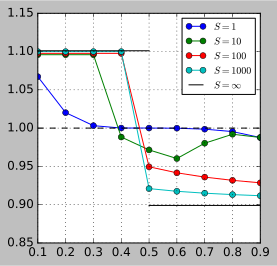

In [8]:
plt.figure(figsize=(4,4))

c = np.sqrt(param.C[1] / param.C[0])
param.p = np.array([0.5, 0.5])


s0, s1 = param.sigma
for i, S in enumerate([1, 10, 100, 1000]):
    
    expq0 = (all_qual0[S] * all_taus0[S]).sum(axis=1)
    expq1 = (all_qual1[S] * all_taus1[S]).sum(axis=1)

    expq0_dp = (all_qual0_dp[S] * all_taus0_dp[S]).sum(axis=1)
    expq1_dp = (all_qual1_dp[S] * all_taus1_dp[S]).sum(axis=1)
    
    qdp = expq0_dp * param.p[0] +  expq1_dp * param.p[1]
    qun = expq0 * param.p[0] +  expq1 * param.p[1]
    
    plt.plot(alphas[:], qun / qdp, 'o-', label='$S={}$'.format(S))

plt.plot(alphas[alphas<=0.5], np.ones(len(alphas[alphas<=0.5])) * 1/(param.p[0]*c + param.p[1]), 'k-', label='$S=\\infty$')
plt.plot(alphas[alphas>=0.5][:], np.ones(len(alphas[alphas>=0.5][:])) * c/(param.p[0]*c + param.p[1]), 'k-')
plt.axhline(1, linestyle='--', color='k')

plt.grid()
plt.legend(loc='best', fontsize=10)
plt.savefig("./fig/disc-qs-C.pdf".format(param.alpha), bbox_inches='tight')